In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv("C:\\Users\\hardi\\OneDrive\\Desktop\\coding\\SGP\\Smart Agri-system\\data\\fertilizer_recommendation.csv")
print(df.head())

   Temperature  Humidity  Moisture Soil Type  Crop Type   N  K   P Fertilizer
0         26.0      52.0      38.0     Sandy      Maize  37  0   0       Urea
1         29.0      52.0      45.0     Loamy  Sugarcane  12  0  36        DAP
2         34.0      65.0      62.0     Black     Cotton   7  9  30   14-35-14
3         32.0      62.0      34.0       Red    Tobacco  22  0  20      28-28
4         28.0      54.0      46.0    Clayey       Rice  35  0   0       Urea


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  8000 non-null   float64
 1   Humidity     8000 non-null   float64
 2   Moisture     8000 non-null   float64
 3   Soil Type    8000 non-null   object 
 4   Crop Type    8000 non-null   object 
 5   N            8000 non-null   int64  
 6   K            8000 non-null   int64  
 7   P            8000 non-null   int64  
 8   Fertilizer   8000 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 562.6+ KB


In [4]:
#changing the column names for better readability
df.rename(columns={'Soil Type':'Soil_Type','Crop Type':'Crop_Type'},inplace=True)

In [5]:
# checking number of unique values
df.nunique()

Temperature    1816
Humidity       3004
Moisture       3723
Soil_Type         5
Crop_Type        11
N                46
K                24
P                47
Fertilizer        7
dtype: int64

In [6]:
# Explore unique crop types
df['Crop_Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Rice', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [7]:
# Explore unique fertilizer recommendations
df['Fertilizer'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [8]:
df.describe(include='all')

,Temperature,Humidity,Moisture,Soil_Type,Crop_Type,N,K,P,Fertilizer
count,8000.000000,8000.000000,8000.000000,8000,8000,8000.000000,8000.000000,8000.000000,8000
unique,NaN,NaN,NaN,5,11,NaN,NaN,NaN,7
top,NaN,NaN,NaN,Clayey,Sugarcane,NaN,NaN,NaN,14-35-14
freq,NaN,NaN,NaN,1623,763,NaN,NaN,NaN,1188
mean,30.338895,59.210731,43.580862,NaN,NaN,18.429125,3.916375,18.512500,NaN
std,4.478262,8.177366,12.596156,NaN,NaN,11.852406,5.494807,13.244113,NaN
min,20.000000,40.020000,20.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,27.050000,53.277500,33.967500,NaN,NaN,9.000000,0.000000,8.000000,NaN
50%,30.240000,59.110000,42.250000,NaN,NaN,14.000000,1.000000,18.000000,NaN
75%,33.460000,65.082500,52.950000,NaN,NaN,26.000000,5.000000,30.000000,NaN


The plot that shows the count (frequency) of each unique crop type in the dataset.
The x-axis represents the different crop types.
The y-axis represents the count (the number of occurrences) of each crop type in the dataset.

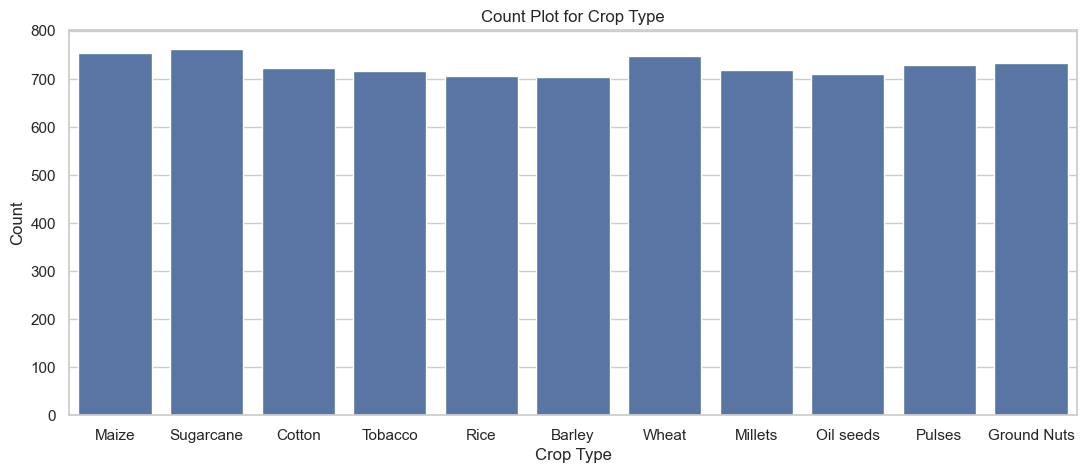

In [9]:
plt.figure(figsize=(13, 5))
sns.set(style="whitegrid")
sns.countplot(data=df, x='Crop_Type')
plt.title('Count Plot for Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.show()

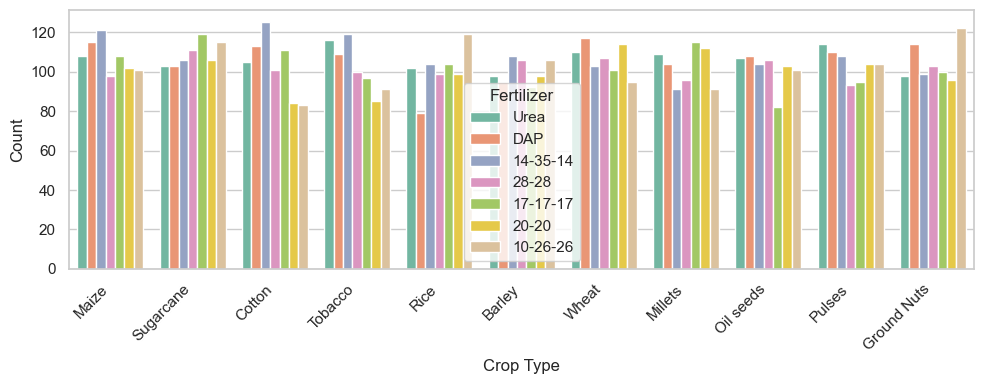

In [10]:
# this plot is provides insights into how different crop types are distributed based on the type of fertilizer used.
# The x-axis represents the different crop types.
# The y-axis represents the count (the number of occurrences) of each crop type in the dataset.

part1_data = df[df['Crop_Type'].isin(df['Crop_Type'].value_counts().index[:])]

# Create the first countplot
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")
sns.countplot(data=part1_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.xlabel('Crop Type') 
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

<Axes: >

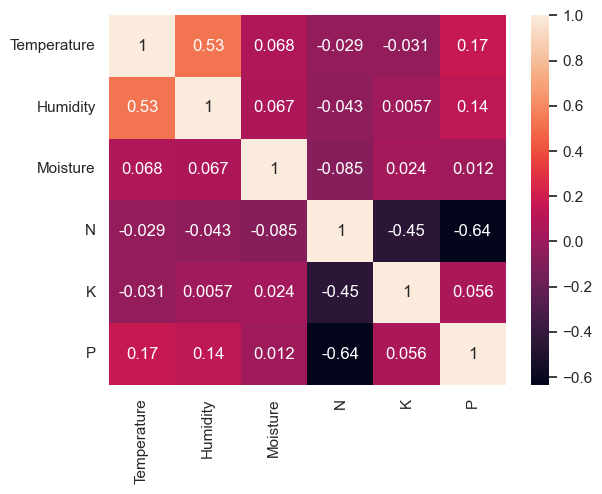

In [11]:
# heatmap to visulize correlation between features
sns.heatmap(df.corr(numeric_only=True), annot=True)

here is no such correlation between any of variables.. 

In [12]:
# label encoding for crop type
le_crop = LabelEncoder()
df['Crop_Type_Encoded'] = le_crop.fit_transform(df['Crop_Type'])

# Create a DataFrame to show the mapping
crop_type_df = pd.DataFrame({
    'Crop_Type': le_crop.classes_,
    'Encoded_Value': le_crop.transform(le_crop.classes_)
})

crop_type_df

,Crop_Type,Encoded_Value
0,Barley,0
1,Cotton,1
2,Ground Nuts,2
3,Maize,3
4,Millets,4
5,Oil seeds,5
6,Pulses,6
7,Rice,7
8,Sugarcane,8
9,Tobacco,9


In [13]:
# label encoding for soil type
le_soil = LabelEncoder()
df['Soil_Type_Encoded'] = le_soil.fit_transform(df['Soil_Type'])

# Create a DataFrame to show the mapping
soil_type_df = pd.DataFrame({
    'Soil_Type': le_soil.classes_,
    'Encoded_Value': le_soil.transform(le_soil.classes_)
})
soil_type_df

,Soil_Type,Encoded_Value
0,Black,0
1,Clayey,1
2,Loamy,2
3,Red,3
4,Sandy,4


In [14]:
# label encoding for fertilizer
le_fertilizer = LabelEncoder()
df['Fertilizer_Encoded'] = le_fertilizer.fit_transform(df['Fertilizer'])

# Create a DataFrame to show the mapping
fertilizer_df = pd.DataFrame({
    'Fertilizer': le_fertilizer.classes_,
    'Encoded_Value': le_fertilizer.transform(le_fertilizer.classes_)
})
fertilizer_df

,Fertilizer,Encoded_Value
0,10-26-26,0
1,14-35-14,1
2,17-17-17,2
3,20-20,3
4,28-28,4
5,DAP,5
6,Urea,6


In [15]:
# spliting the data train and test
x = df.drop("Fertilizer", axis=1)
y = df["Fertilizer"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Shape of split data:")
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

# here 20% of the data should be used for testing (evaluation), and the remaining 80% is used for training

Shape of split data:
x_train = (6400, 11), y_train = (6400,), x_test = (1600, 11), y_test = (1600,)


In [ ]:
# random forest classifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42)

grid_params = {
    'n_estimators': [200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(estimator=rf, param_grid=grid_params, cv=5, n_jobs=-1, verbose=2)

X_train_transformed = X_train.select_dtypes(include=[np.number])
grid.fit(X_train_transformed, y_train)

print("Best Hyperparameters:", grid.best_params_)

best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
